Creates a graphical comparison of horizontal alignments from IFC-Rail-Unit-Test-Reference-Code and IfcOpenShell

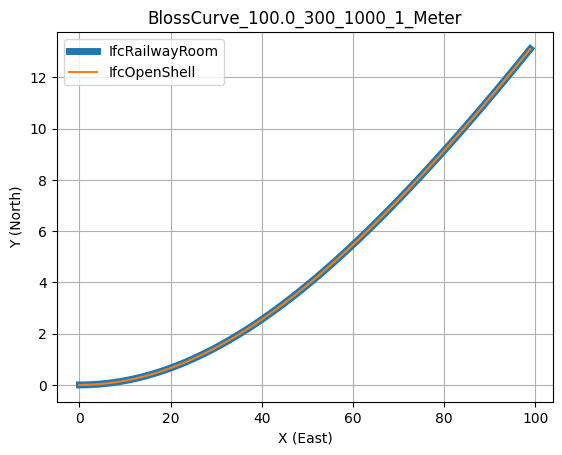

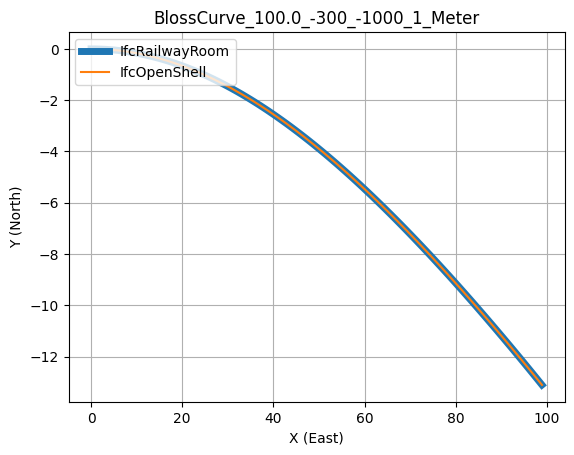

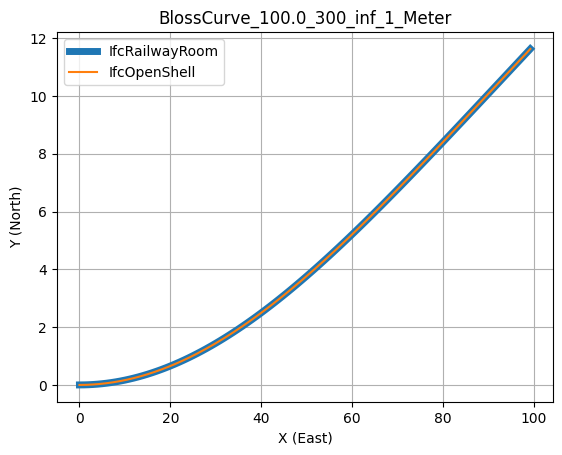

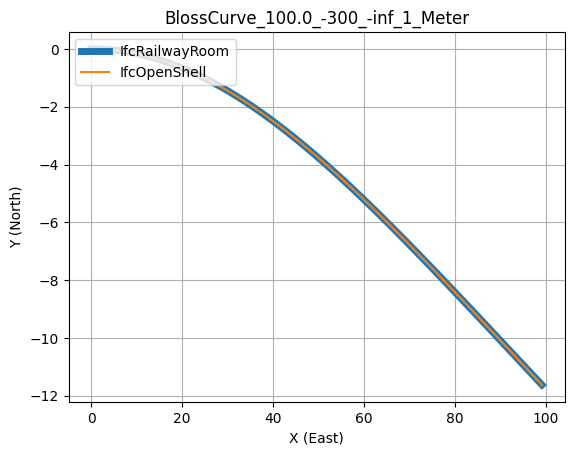

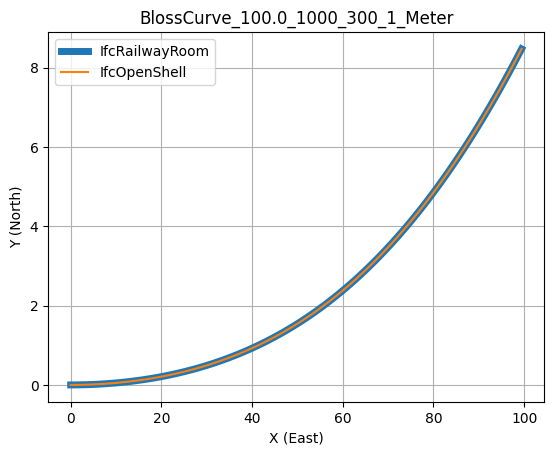

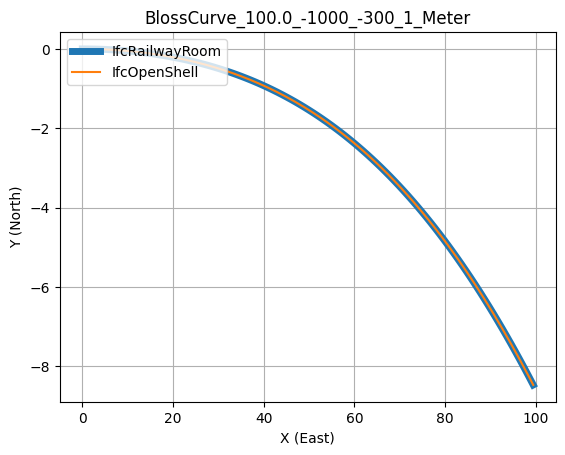

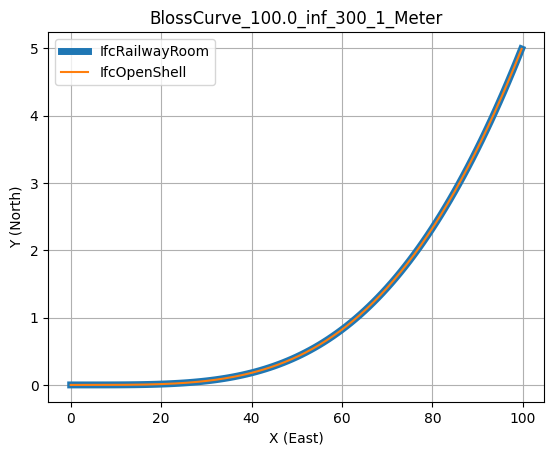

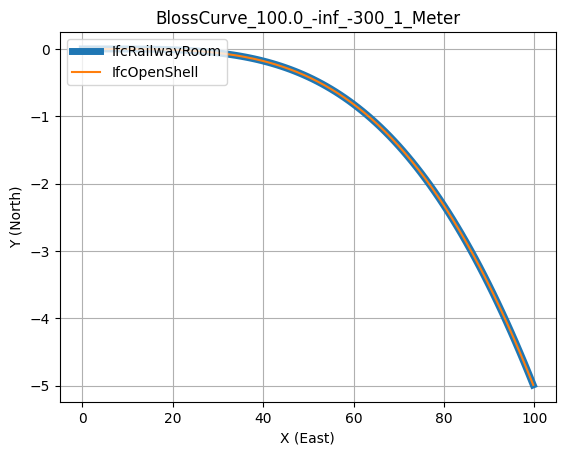

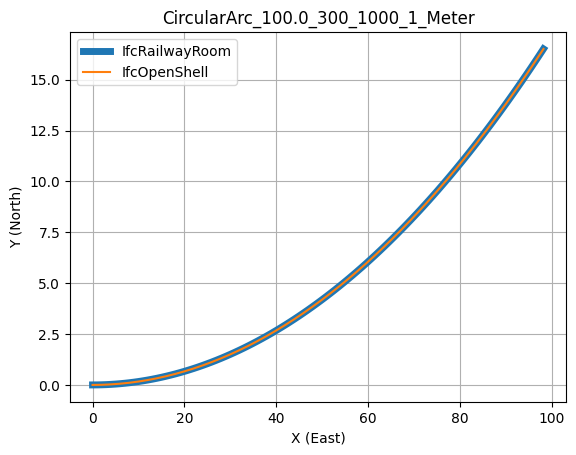

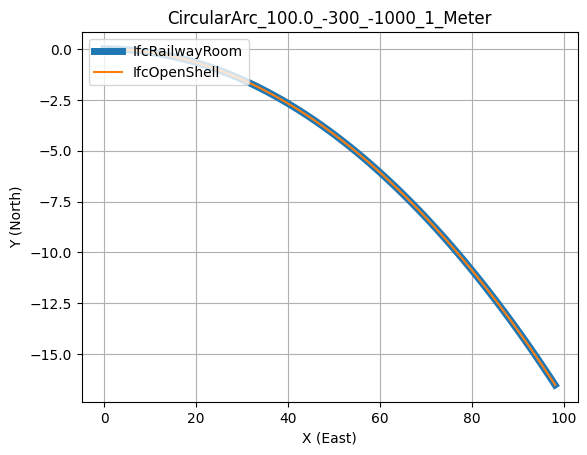

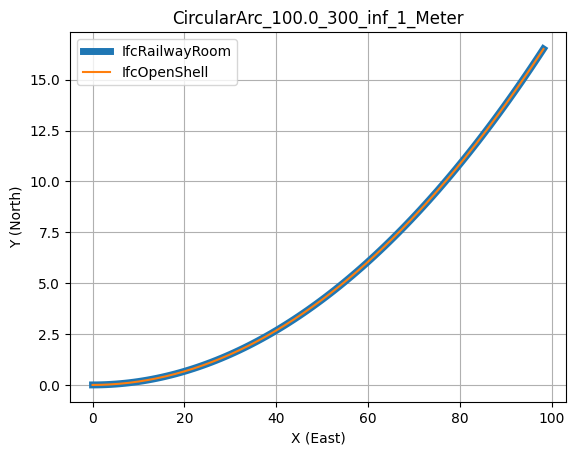

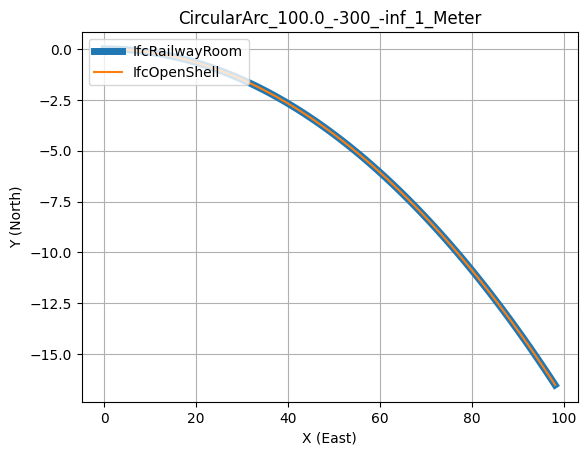

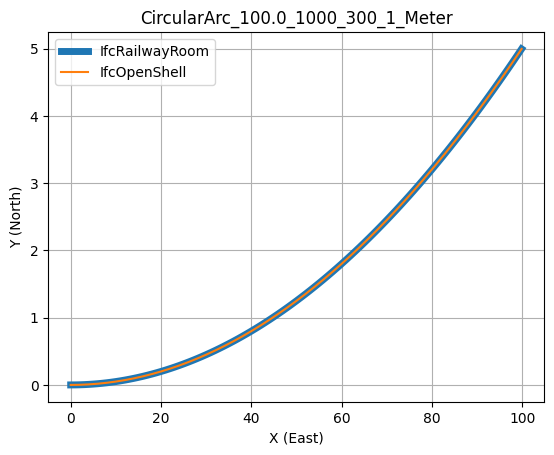

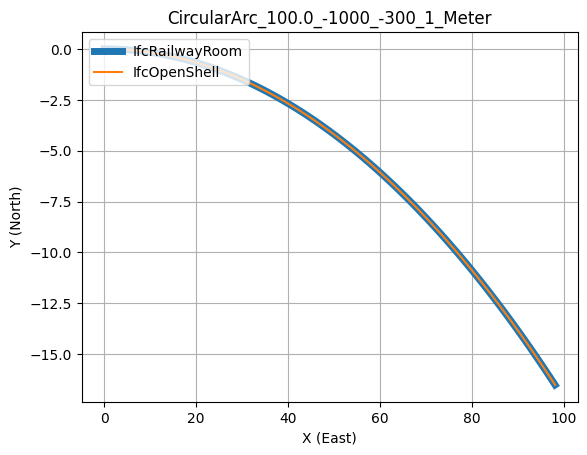

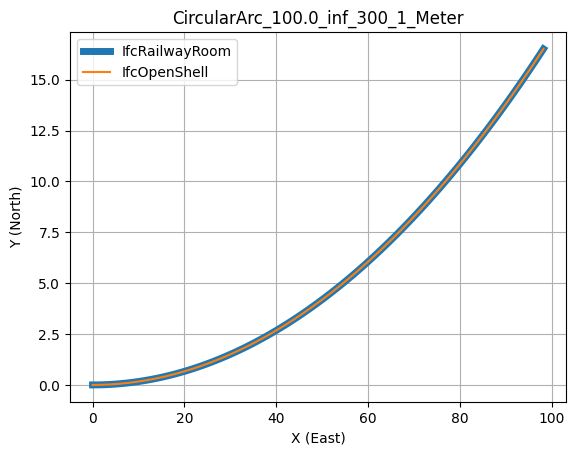

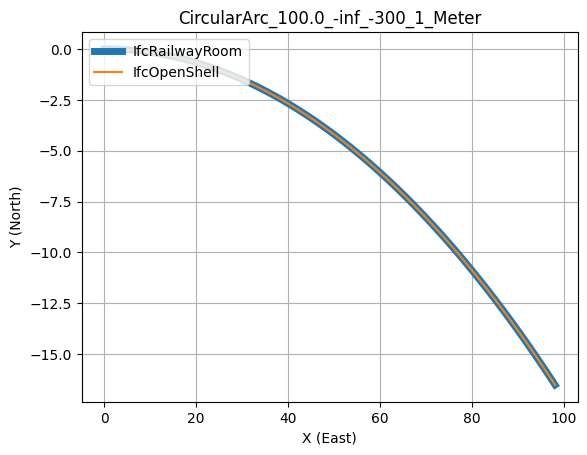

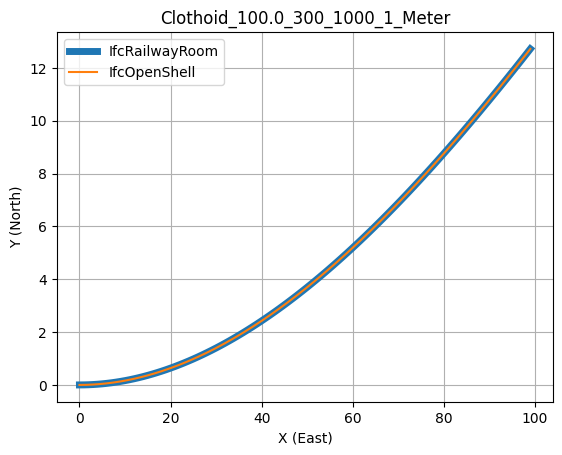

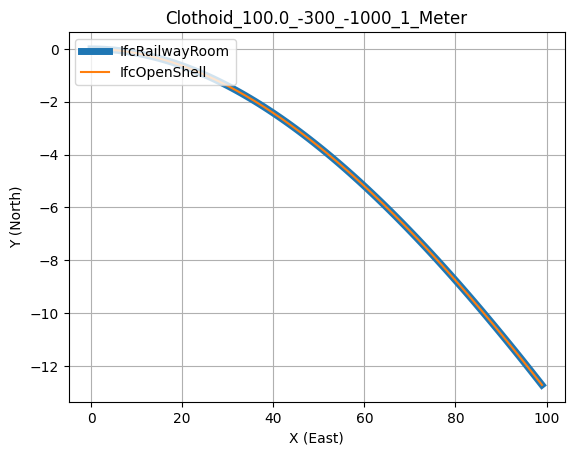

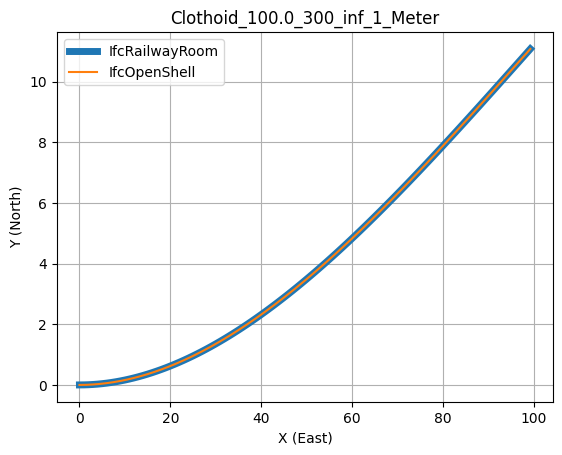

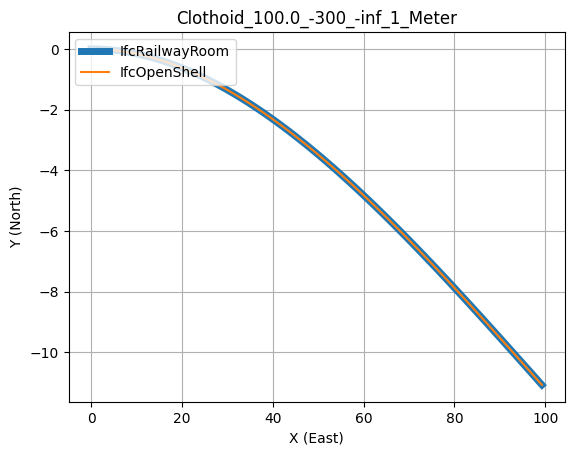

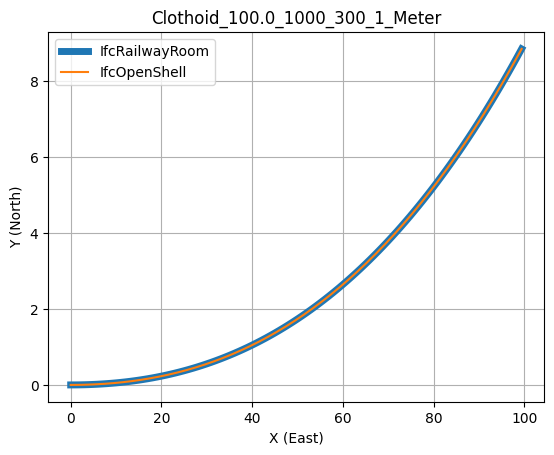

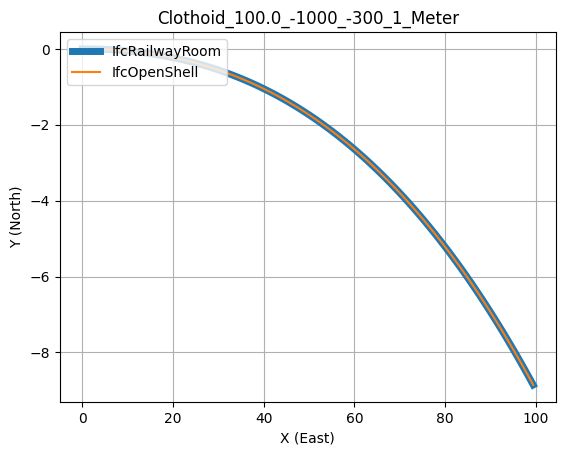

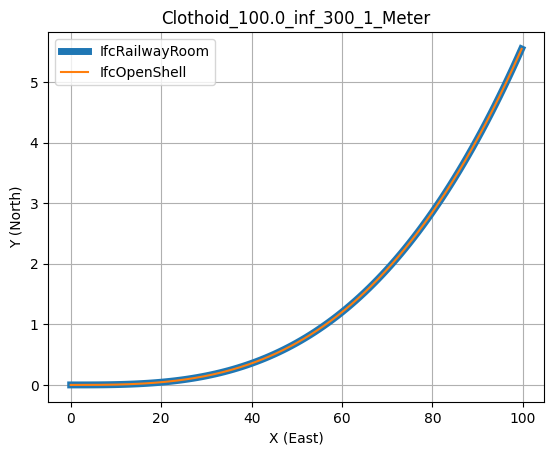

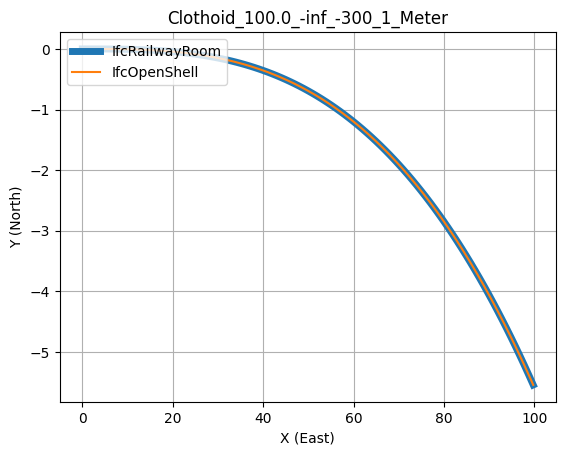

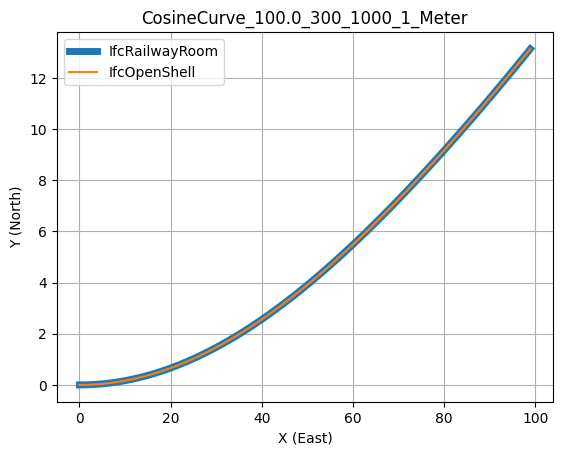

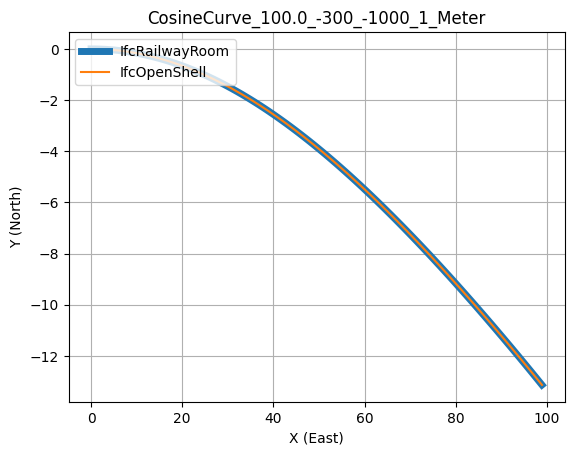

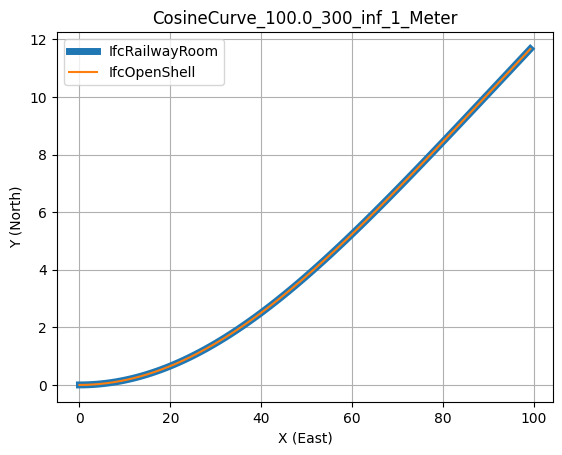

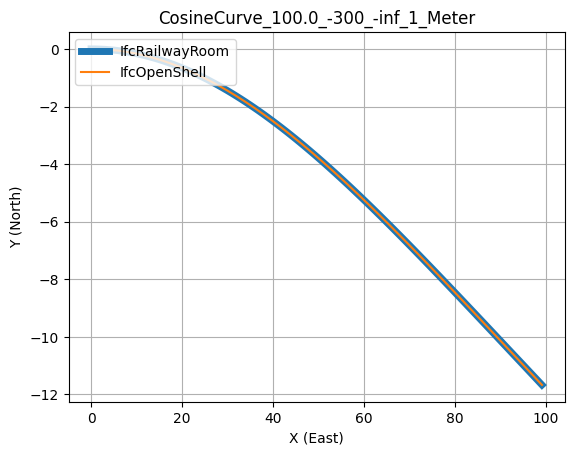

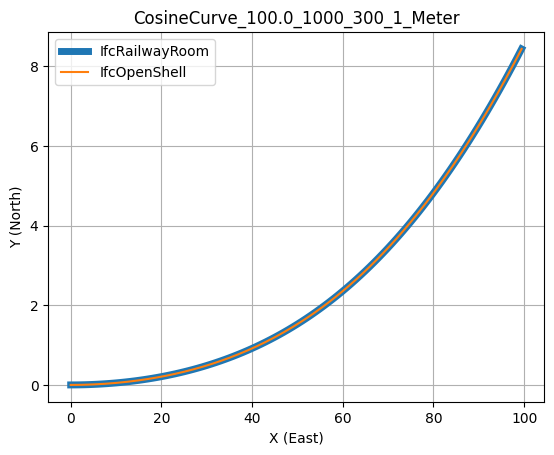

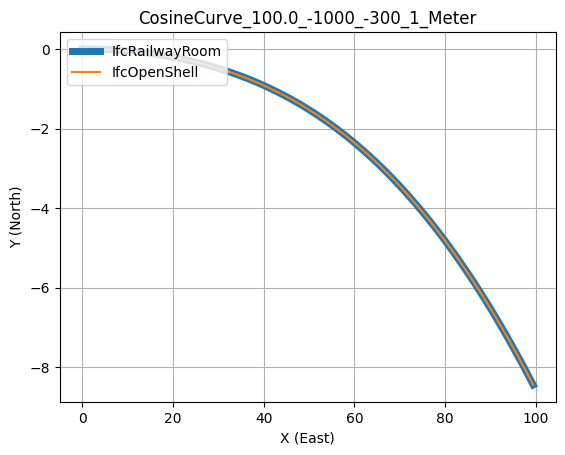

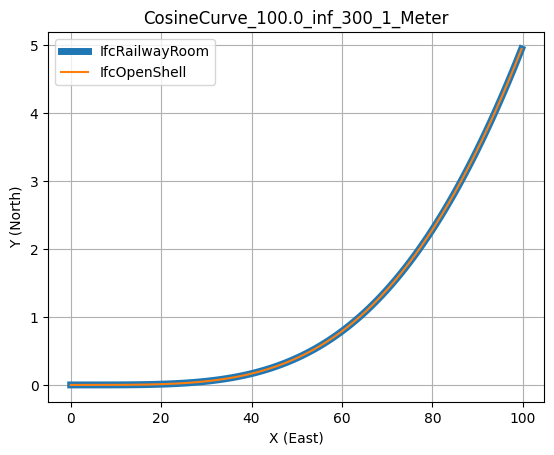

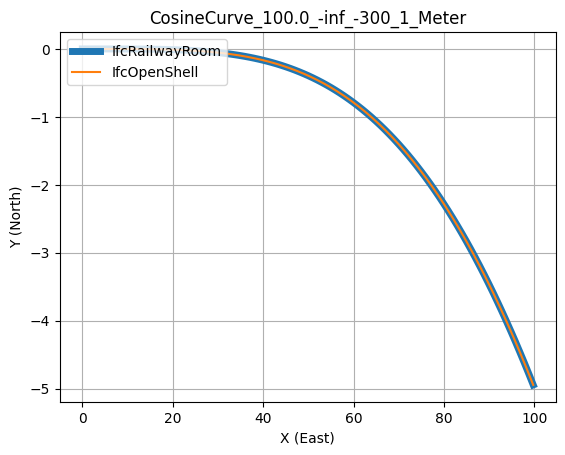

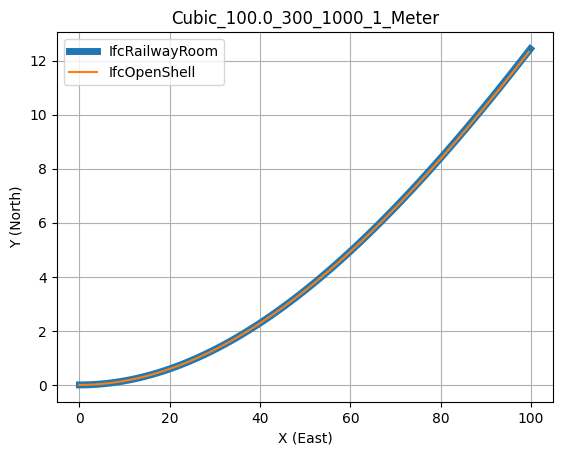

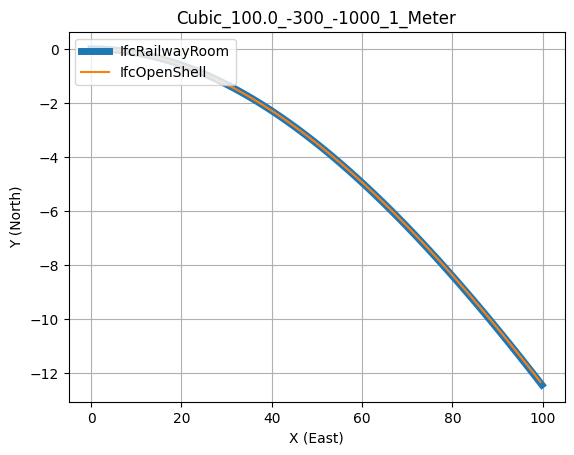

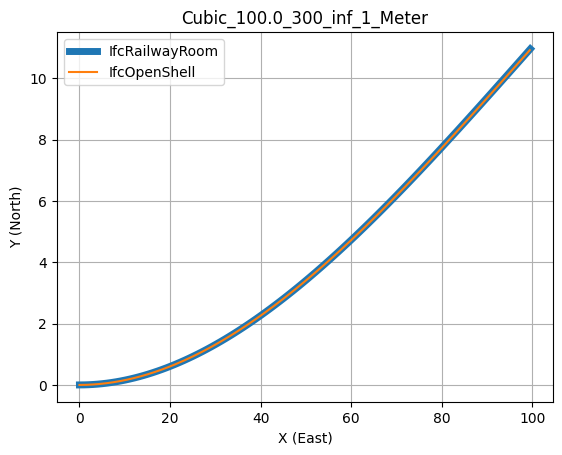

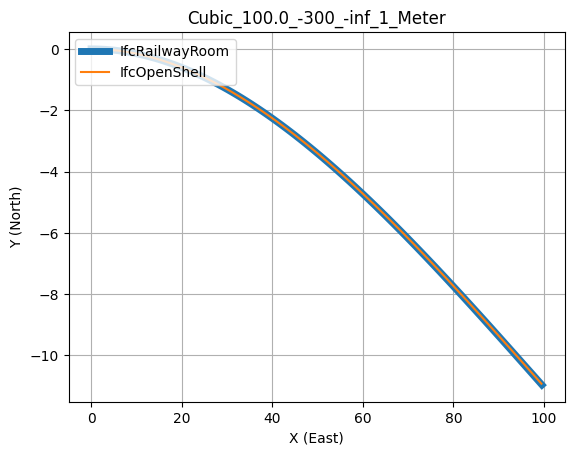

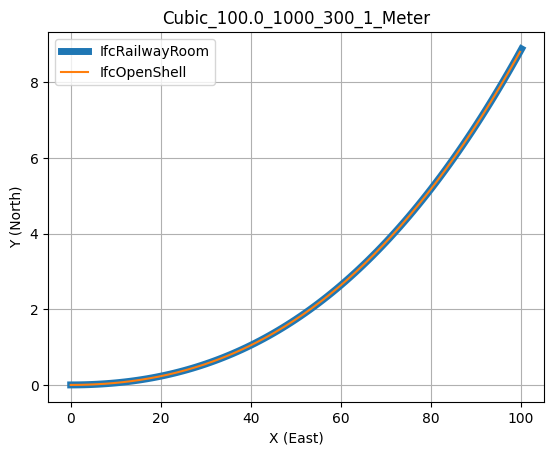

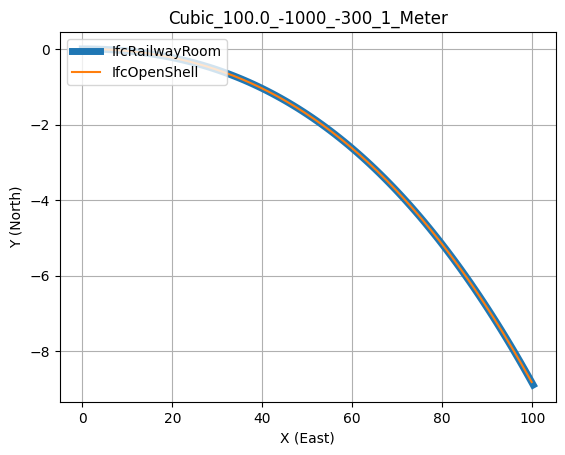

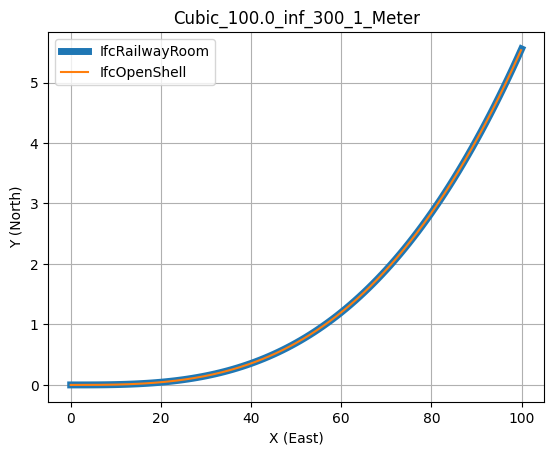

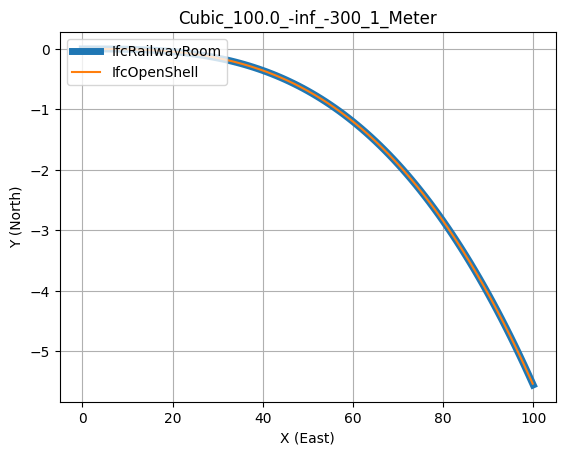

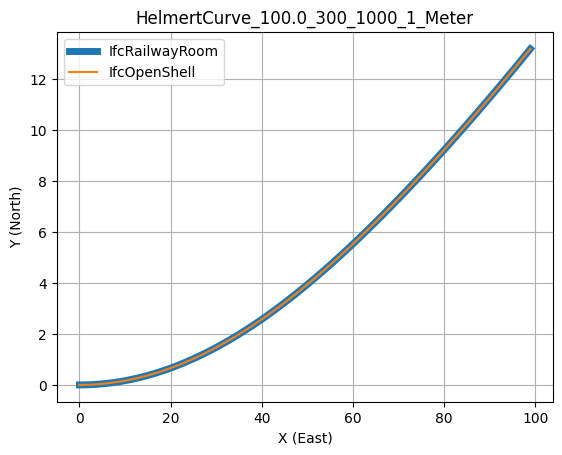

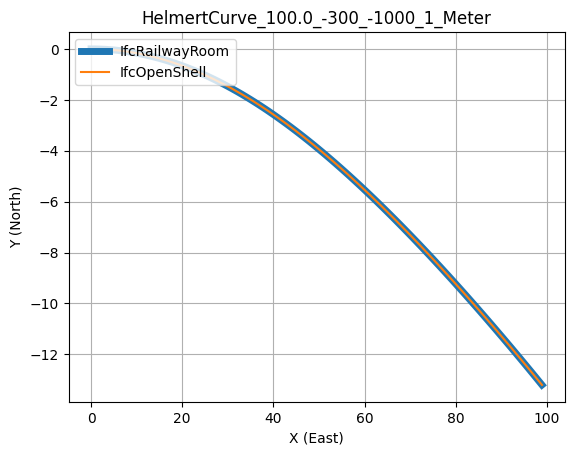

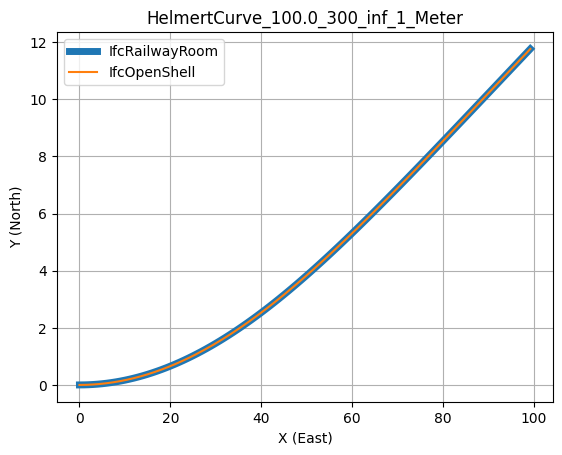

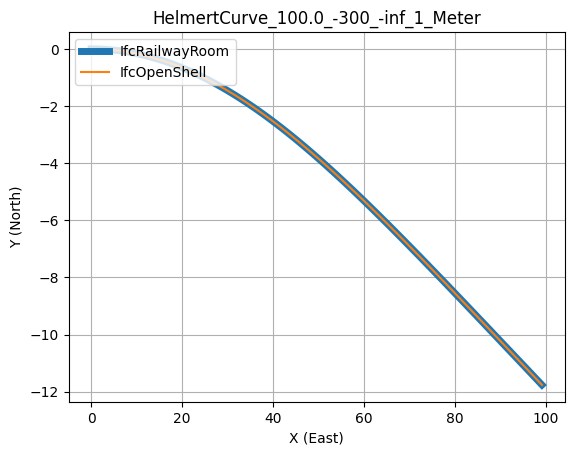

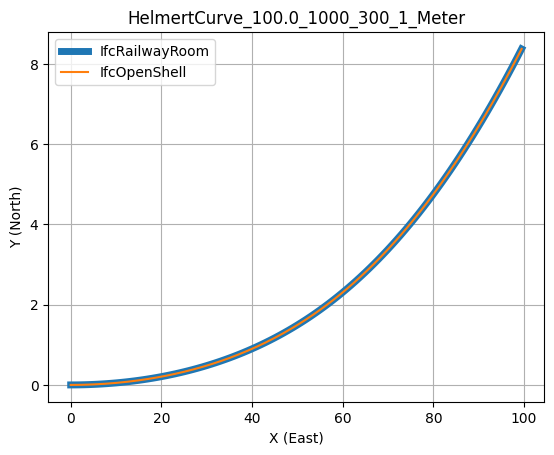

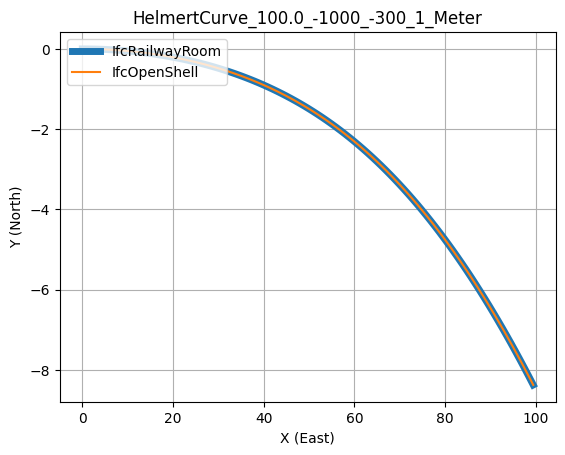

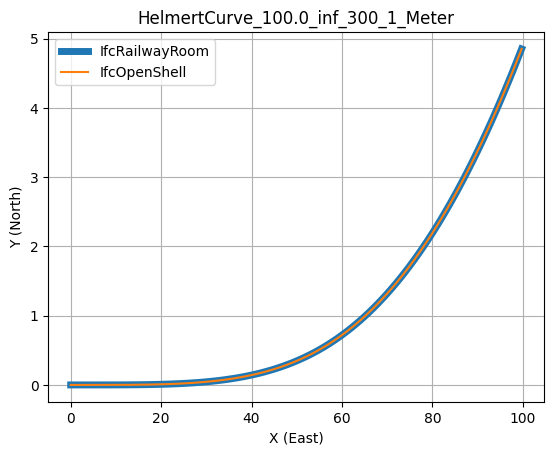

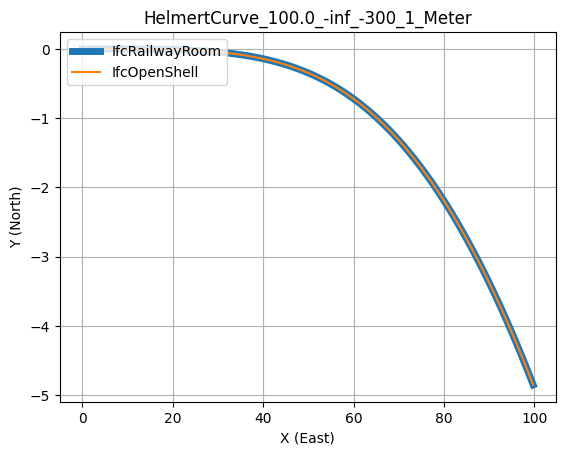

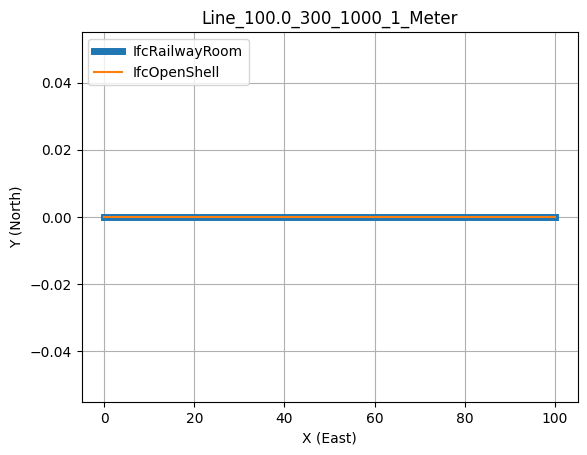

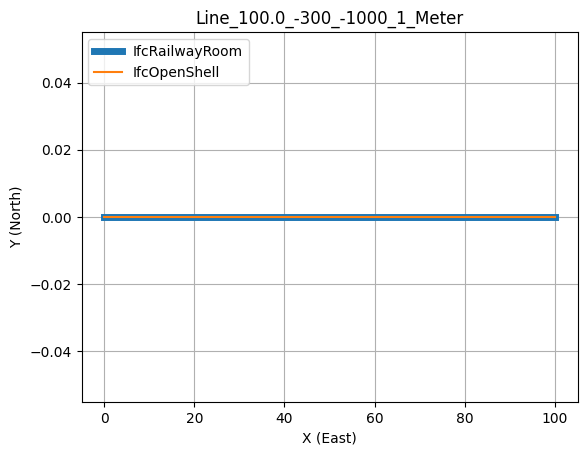

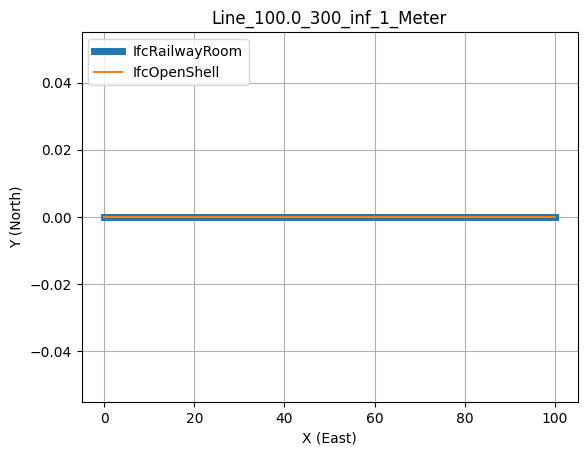

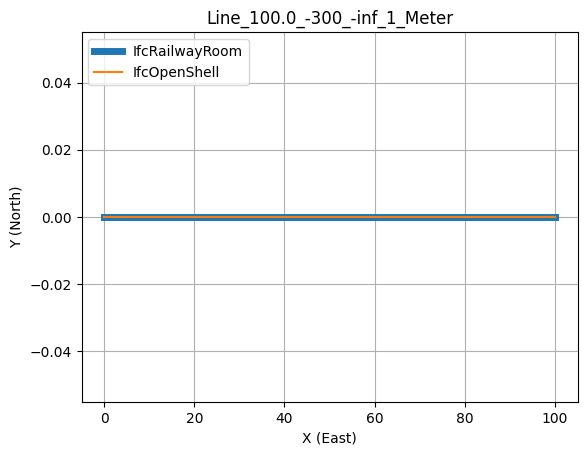

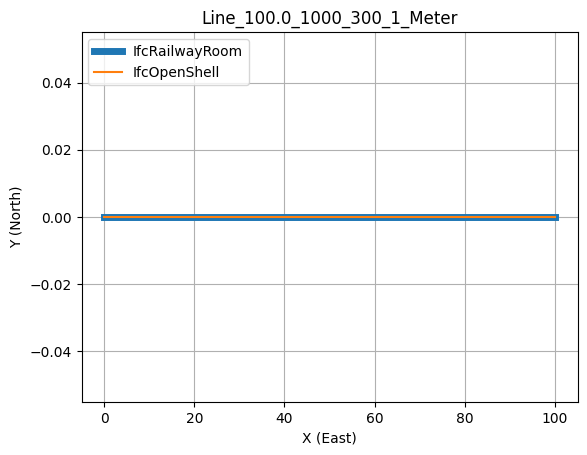

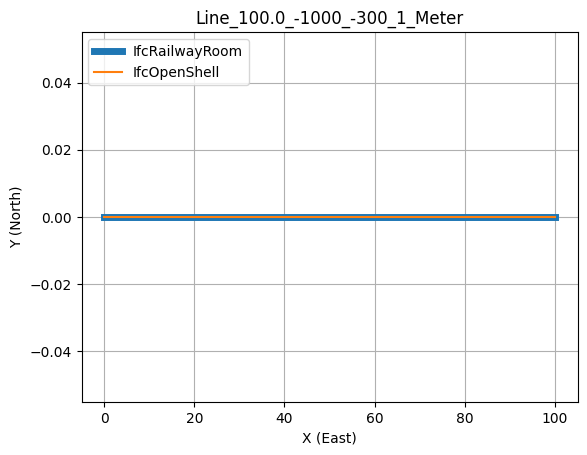

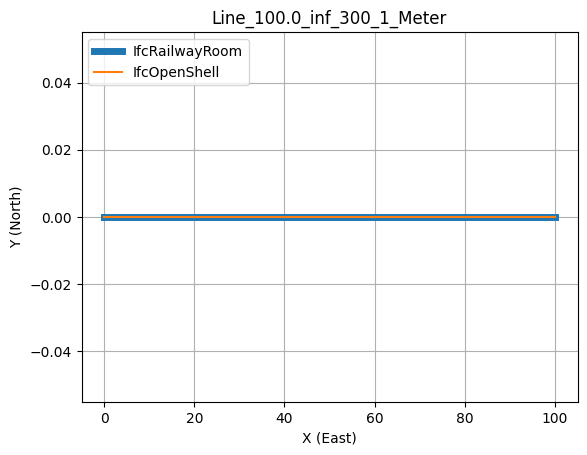

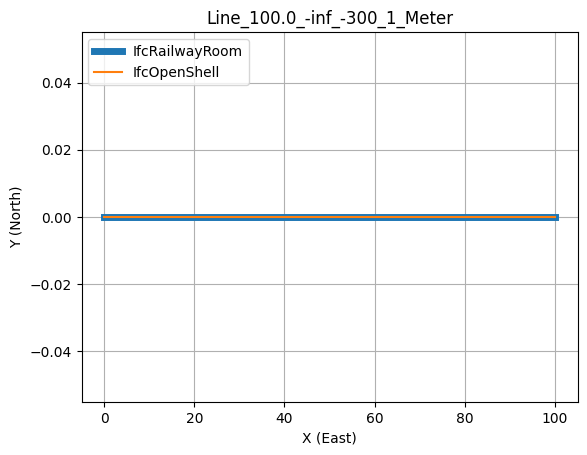

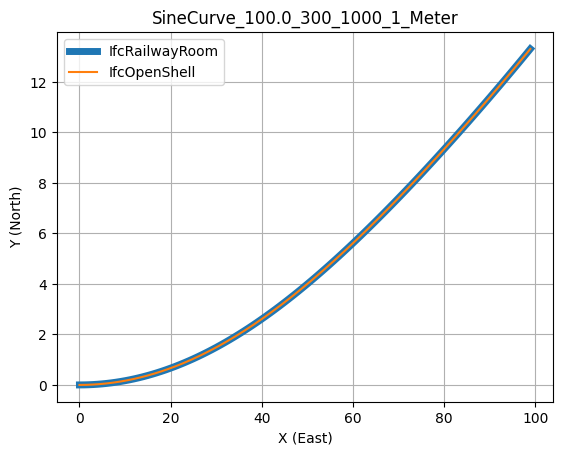

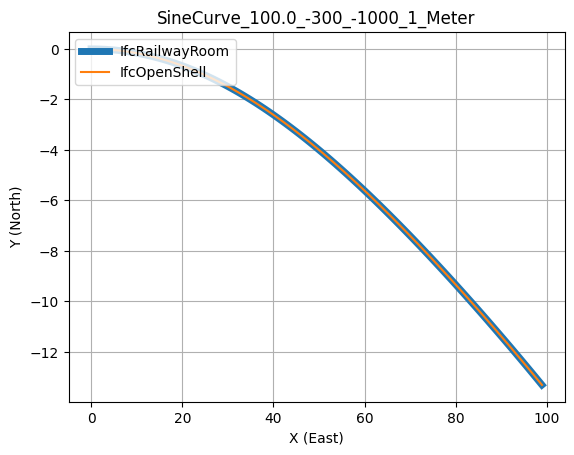

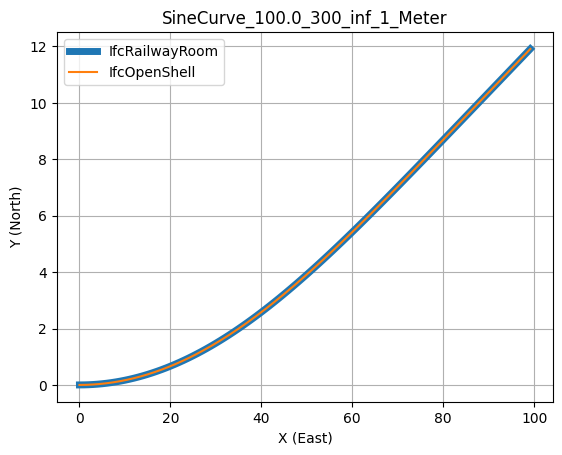

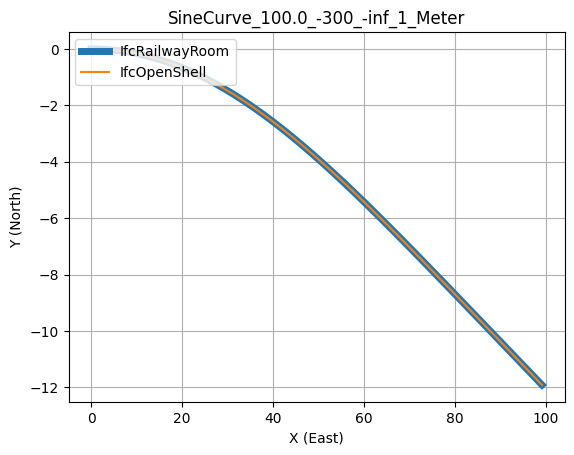

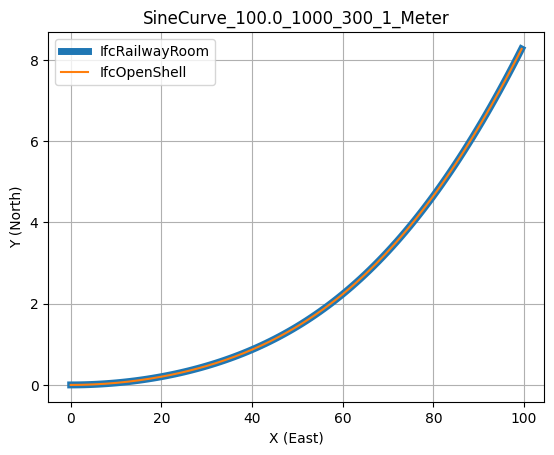

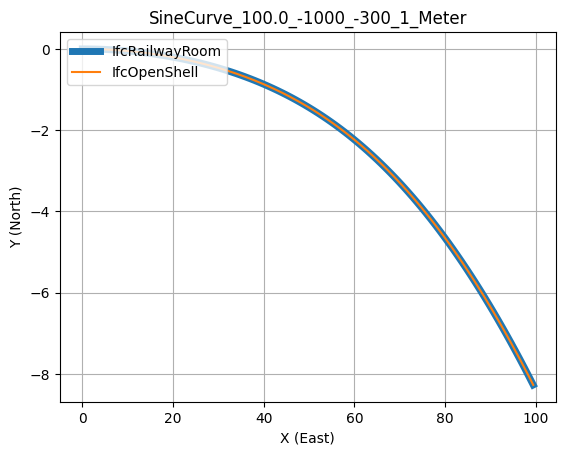

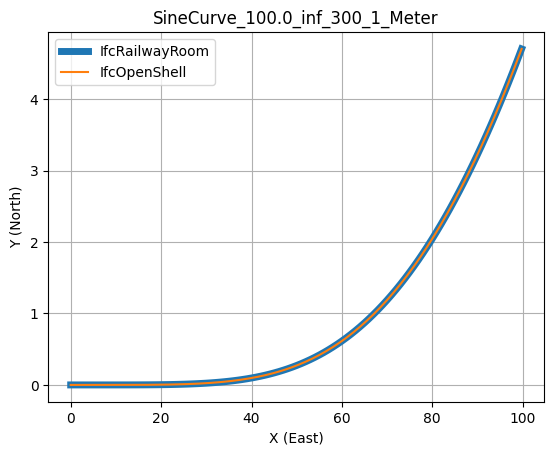

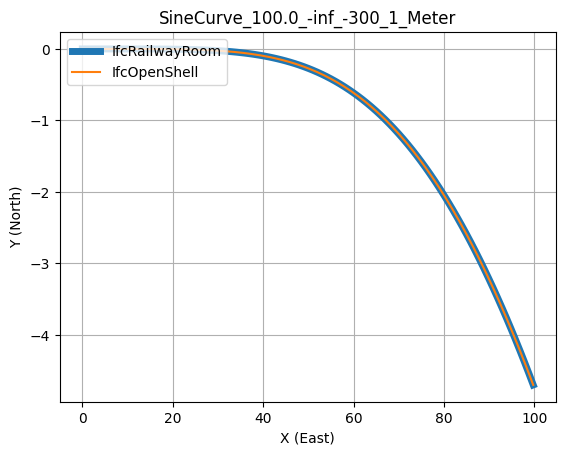

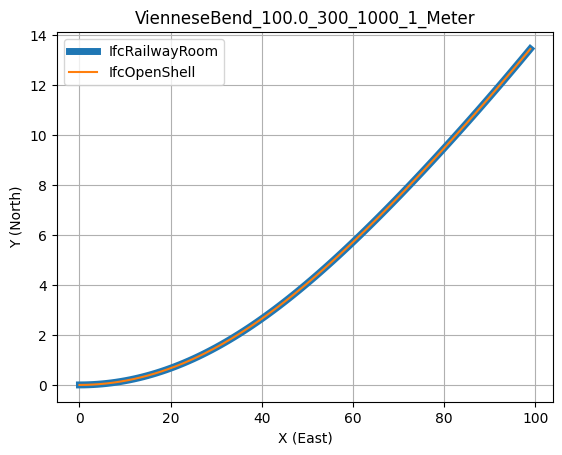

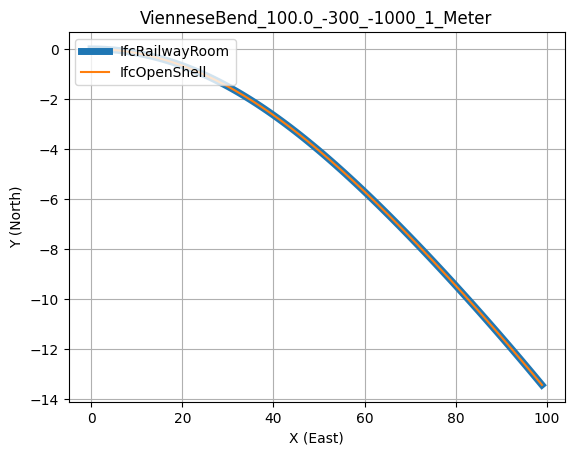

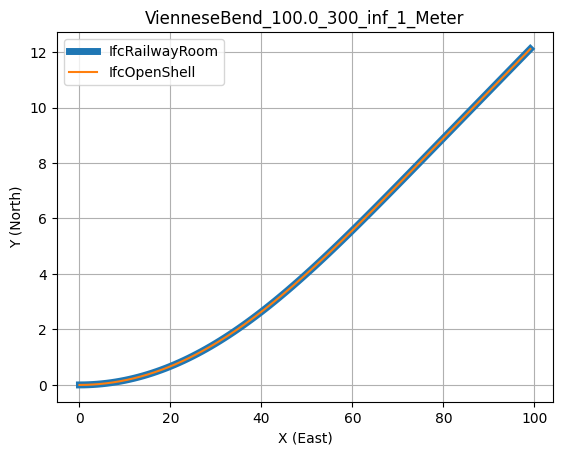

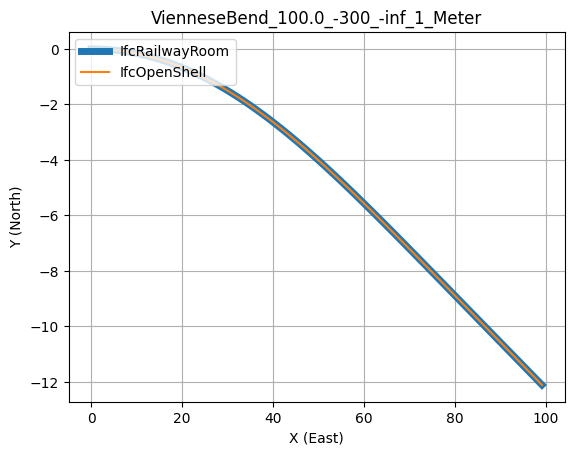

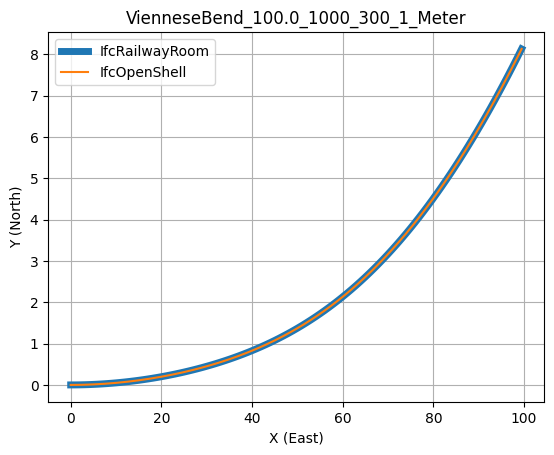

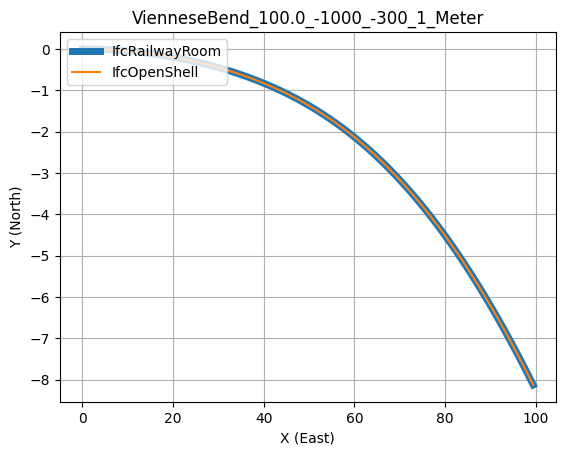

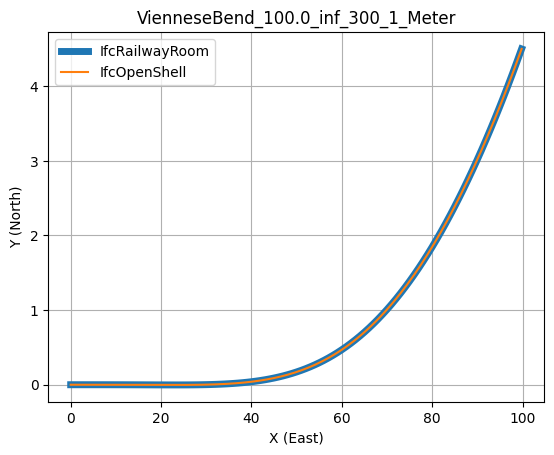

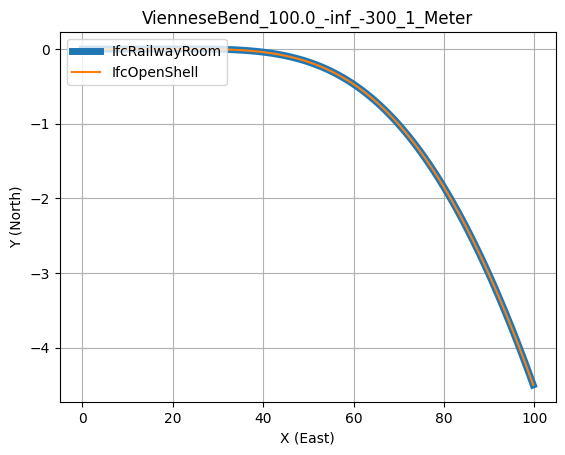

In [1]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

curve_types = ["BlossCurve","CircularArc","Clothoid","CosineCurve","Cubic","HelmertCurve","Line","SineCurve","VienneseBend"]
for curve_type in curve_types:
    test_cases = []
    test_cases.append(curve_type + "_100.0_300_1000_1_Meter")
    test_cases.append(curve_type + "_100.0_-300_-1000_1_Meter")
    test_cases.append(curve_type + "_100.0_300_inf_1_Meter")
    test_cases.append(curve_type + "_100.0_-300_-inf_1_Meter")
    test_cases.append(curve_type + "_100.0_1000_300_1_Meter")
    test_cases.append(curve_type + "_100.0_-1000_-300_1_Meter")
    test_cases.append(curve_type + "_100.0_inf_300_1_Meter")
    test_cases.append(curve_type + "_100.0_-inf_-300_1_Meter")
    
    for test_case in test_cases:
        model = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__HorizontalAlignment_" + test_case + ".ifc")
        results_file = "F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/ToolboxProcessed/HorizontalAlignment/" + curve_type + "/" + test_case + ".txt"
        with open(results_file,'r') as f:
            lines = f.readlines()[2:] # skip the first two header lines
        
        x_values = []
        y_values = []
        for line in lines:
            s,x,y = map(float,line.split())
            x_values.append(x)
            y_values.append(y)
        
        fig1 = plt.figure().add_subplot()
        fig1.plot(x_values,y_values,label="IfcRailwayRoom",linewidth=5)
    
        curves = model.by_type("IfcCompositeCurve",False)
       
        settings = geom.settings()
        
        
        for curve in curves:
            shape = geom.create_shape(settings,curve)
            verts = shape.verts
            verts = np.array(verts).reshape((-1,3))
            x,y,z = verts.T
            fig1.plot(x,y,label="IfcOpenShell")
            
        fig1.set_title(test_case)
        fig1.legend(loc="upper left")
        #fig1.axis("square")
        fig1.set_xlabel("X (East)")
        fig1.set_ylabel("Y (North)")
        fig1.grid(True)
        plt.show()
